In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **1주차 정리**

## 1.YOLO
- Pretrained YOLO 모델(yolov8n)로 데이터셋의 background 와 normal/damaged 폴더를 차량아님/차량 으로 구분하는 테스트 수행시 Accuracy Score 0.7169 확인
- YOLO의 pretrained 모델은 차량의 전체 이미지를 학습한 것에 반해 우리의 데이터셋중 파손DATA는 차량의 일부만 촬영된 부분이 많기 때문

## 2.Resnet18
- Pretrained 모델을 호출하여 주어진 데이터셋으로 차량여부를 판단하는 Stage1 모델과 차량파손여부를 판단하는 Stage2 모델을 개발
- Stage1: Accuracy 0.97, f1 0.96
- Stage2: Accuracy 0.99, f1 0.96

※ 각 단계별 모델학습 epoch 설정을 20으로 했을때보다 5로 설정하였을때 모델 성능이 일부 더 좋았으나 아래에서 Resnet18 모델은 epoch 설정을 20으로 한 모델을 활용하였음

# **2주차: 차량파손여부**

## 1.1주차때 학습했던 Resnet18 모델의 성능 추가 검증
- 1주차에서 주어진 데이터셋으로 개발된 모델(Resnet18)의 성능을 좀 더 구체적으로 확인하기 위해 Kaggle에서 구한 데이터셋(정상차량, 파손차량)을 활용하여 테스트
- 정상차량 920개 중 612개를 정상차량으로 판단(308개는 파손으로 잘못 탐지) -> Accuracy: 0.6652(612/920)
- 파손차량 920개 중 524개를 파손차량으로 판단(396개는 정상으로 잘못 탐지) -> Accuracy: 0.5696(524/920)

※ 모델 경로\
/(share)HDMF_AUTO_SPOKE/SUBJECT/WEEK1_CAR_DETECTION/JR/01.Model/damage_classifier_stage2(20epoch).pth

※ 코드 경로\
/(share)HDMF_AUTO_SPOKE/SUBJECT/WEEK2_CAR_DAMAGE_DETECTION/JR/02.Code/(25.12.19)_Damaged_Detection_Test(by resnet18).ipynb

### **[참고] 테스트에 활용한 Kaggle Datasets**(Car damage detection)

출처: https://www.kaggle.com/datasets/anujms/car-damage-detection

1행: 정상차량, 2행: 파손차량


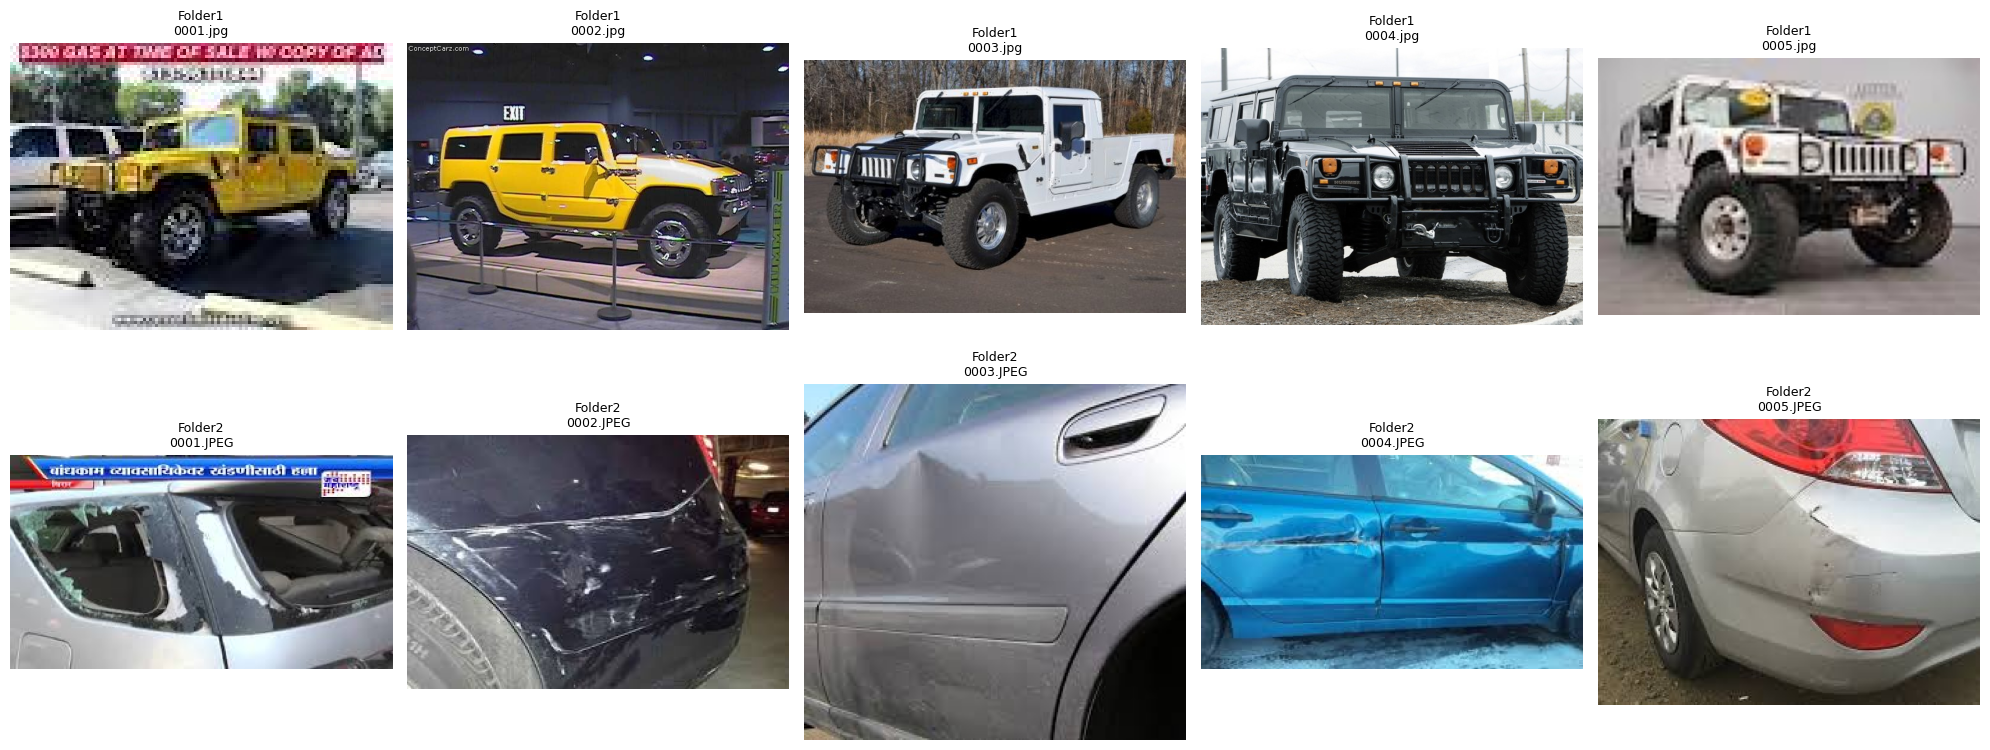

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# ===== 설정 =====
FOLDER_1 = r"/content/gdrive/MyDrive/01.DS Part/99.Study/00. Searching Datasets/Kaggle(Car damage detection)/training/01-whole"   # 첫 번째 폴더
FOLDER_2 = r"/content/gdrive/MyDrive/01.DS Part/99.Study/00. Searching Datasets/Kaggle(Car damage detection)/training/00-damage"   # 두 번째 폴더
N_SHOW = 5

def get_top_images(folder, n):
    files = sorted([
        f for f in os.listdir(folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp"))
    ])
    return files[:n]

imgs_1 = get_top_images(FOLDER_1, N_SHOW)
imgs_2 = get_top_images(FOLDER_2, N_SHOW)

if len(imgs_1) == 0 or len(imgs_2) == 0:
    raise ValueError("한쪽 폴더에 이미지가 없습니다.")

print('1행: 정상차량, 2행: 파손차량')

# ===== 시각화 =====
plt.figure(figsize=(4 * N_SHOW, 8))

# 1행: 첫 번째 폴더
for i, fname in enumerate(imgs_1):
    img = Image.open(os.path.join(FOLDER_1, fname))
    plt.subplot(2, N_SHOW, i + 1)
    plt.imshow(img)
    plt.title(f"Folder1\n{fname}", fontsize=9)
    plt.axis("off")

# 2행: 두 번째 폴더
for i, fname in enumerate(imgs_2):
    img = Image.open(os.path.join(FOLDER_2, fname))
    plt.subplot(2, N_SHOW, N_SHOW + i + 1)
    plt.imshow(img)
    plt.title(f"Folder2\n{fname}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


### **[참고] Study Datasets**

1행: 정상차량, 2행: 파손차량


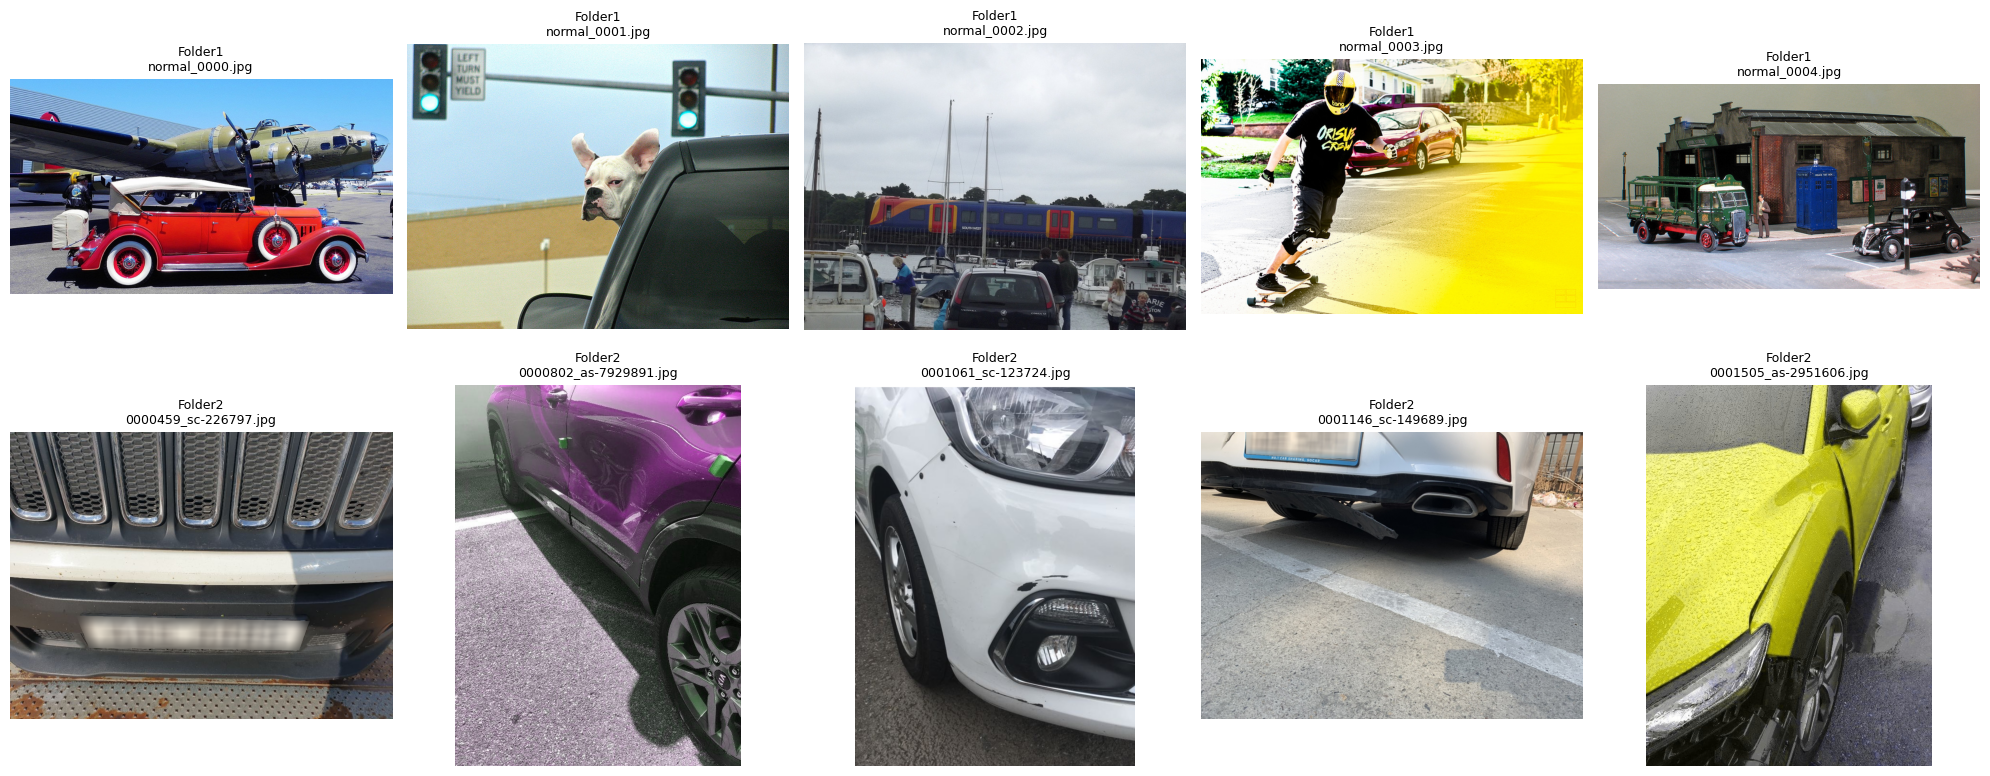

In [10]:
# ===== 설정 =====
FOLDER_3 = r"/content/gdrive/MyDrive/01.DS Part/99.Study/(share)HDMF_AUTO_SPOKE/DATA/(share)2026_ImageDetectionStudy_No_resizing/normal/images"   # 첫 번째 폴더
FOLDER_4 = r"/content/gdrive/MyDrive/01.DS Part/99.Study/(share)HDMF_AUTO_SPOKE/DATA/(share)2026_ImageDetectionStudy_No_resizing/damaged/images"   # 두 번째 폴더
N_SHOW = 5

imgs_3 = get_top_images(FOLDER_3, N_SHOW)
imgs_4 = get_top_images(FOLDER_4, N_SHOW)

if len(imgs_1) == 0 or len(imgs_2) == 0:
    raise ValueError("한쪽 폴더에 이미지가 없습니다.")

print('1행: 정상차량, 2행: 파손차량')

# ===== 시각화 =====
plt.figure(figsize=(4 * N_SHOW, 8))

# 1행: 첫 번째 폴더
for i, fname in enumerate(imgs_3):
    img = Image.open(os.path.join(FOLDER_3, fname))
    plt.subplot(2, N_SHOW, i + 1)
    plt.imshow(img)
    plt.title(f"Folder1\n{fname}", fontsize=9)
    plt.axis("off")

# 2행: 두 번째 폴더
for i, fname in enumerate(imgs_4):
    img = Image.open(os.path.join(FOLDER_4, fname))
    plt.subplot(2, N_SHOW, N_SHOW + i + 1)
    plt.imshow(img)
    plt.title(f"Folder2\n{fname}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


## 2.Kaggle Dataset으로 모델 학습
- Kaggle의 (Car damage detection) Dataset으로 차량파손여부를 분류하는 모델을 학습해 보았음(Resnet18 Pretrained model 활용)
- Dataset 구조(Train: 정상 920, 파손: 920, Val: 정상 320, 파손 320)
- 모델 성능은 동일한 Datasets의 val Data를 활용하였을때 정확도 0.9609로 매우 유효하였음

Confusion Matrix (rows=true, cols=pred):\
 [[222 /  8]\
 [ 10 / 220]]

 ※ 모델 경로
 ./(share)HDMF_AUTO_SPOKE/SUBJECT/WEEK2_CAR_DAMAGE_DETECTION/JR/01.Model/resnet18_damage_vs_whole_best.pth

 ※ 코드 경로
 ./(share)HDMF_AUTO_SPOKE/SUBJECT/WEEK2_CAR_DAMAGE_DETECTION/JR/02.Code/(25.12.19) Damaged_Detection_Modeling(with different datasets).ipynb

### 2-1. Kaggle Dataset으로 만든 모델을 Study Dataset으로 재검증
- 하지만 이 모델을 다시 Study Dataset으로 검증해 보기 위해 Study Data의 Damaged를 Damaged로 잘 분류하는지 확인해 보았으나 정확도는 0.3958로 매우 낮게 나타남
- Total images           : 1200
- Pred DAMAGED (correct) : 475
- Pred NORMAL (wrong/FN) : 725
- Accuracy               : 0.3958 (475/1200)

 ※ 코드 경로
 /content/gdrive/MyDrive/01.DS Part/99.Study/(share)HDMF_AUTO_SPOKE/SUBJECT/WEEK2_CAR_DAMAGE_DETECTION/JR/02.Code/(25.12.19)_Damaged_Detection_Test(by resnet18_2nd).ipynb